# Simplyfied geologic model of a volcanic diatreme structure


### written by A. Ziegon


Imports

In [110]:
# Imports and settings
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

import gempy as gp

# Importing auxiliary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Setting options
np.random.seed(1515)
pd.set_option('precision', 2)

### Loading surface points and orientations

In [111]:
geo_model = gp.create_model('simple_diatreme')

# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [0, 150, 0, 150., 0, 60], [40, 40, 40],
             path_i='RM_surface_points.csv', path_o='RM_orientations_no_mantle_orientation.csv', default_values=True)

Active grids: ['regular']


simple_diatreme  2022-11-22 16:56

Sorting formations

In [112]:
gp.map_stack_to_surfaces(geo_model,
                         {"Soil":('Soil'),"Intrusion":('Diatreme'),"SS_Formation": ('SS','CSS','basement')},
                         remove_unused_series=True)

,surface,series,order_surfaces,color,id
3,Soil,Soil,1,#728f02,1
2,Diatreme,Intrusion,1,#ffbe00,2
0,CSS,SS_Formation,1,#015482,3
1,SS,SS_Formation,2,#9f0052,4
4,basement,SS_Formation,3,#443988,5


Set the discontinuity (i.e., the intrusion surface) as a fault similar to the subduction example in the tutorials.

[not sure if thats correct]

In [125]:
geo_model.set_is_fault(['Intrusion'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Soil,1,Erosion,True,False,False
Intrusion,2,Fault,True,True,False
SS_Formation,3,Erosion,True,False,False


Set Colorscheme

In [126]:
geo_model.surfaces.colors.change_colors({'CSS': '#8b4513','SS':'#ff9912', 'basement': '#8b8878','Soil':'#bcee68','Diatreme':'#ee0000'})

Set random topography

In [127]:
geo_model.set_topography(source='random')

[48. 60.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  1.875     ,   1.875     ,   0.75      ],
       [  1.875     ,   1.875     ,   2.25      ],
       [  1.875     ,   1.875     ,   3.75      ],
       ...,
       [150.        , 142.30769231,  53.03747241],
       [150.        , 146.15384615,  52.94989041],
       [150.        , 150.        ,  53.76600706]])

### First inspection of data points in 2D and 3D

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


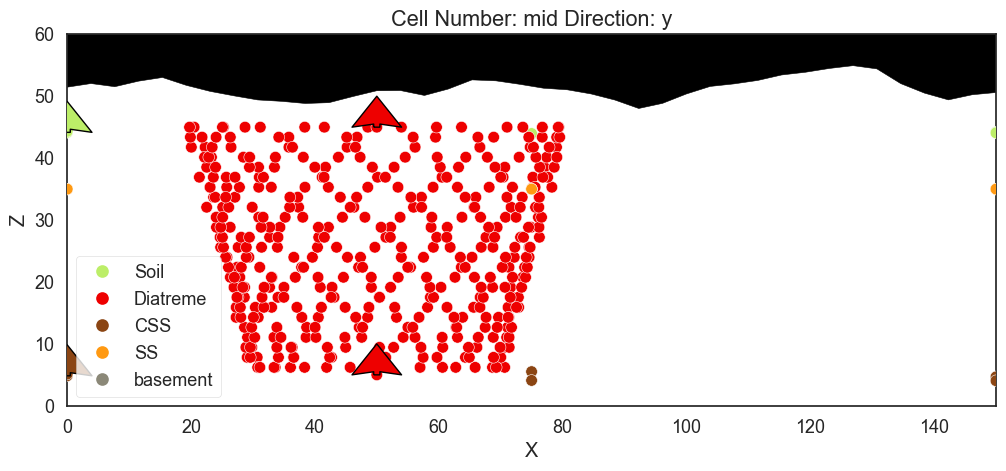

In [128]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False, show_topography=True)
plt.show()

gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_topography=True)

### Set interpolator and solve model

In [129]:
gp.set_interpolator(geo_model, compile_theano=True, theano_optimizer='fast_compile')
sol = gp.compute_model(geo_model, debug=False)

Setting kriging parameters to their default values.
Compiling theano function...


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  warnings.warn(
C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\theano\scan_module\scan_perform_ext.py:75: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are prob

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                     values
range               220.45
$C_o$              1157.14
drift equations  [3, 3, 3]


C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.geological_map = np.array(


Visualizing solution in 3D

In [130]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, show_data=False, show_lith=False, image=False, plotter_type='basic')

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\pyvista\plotting\tools.py:571: PyvistaDeprecationWarning: The usage of `parse_color` is deprecated in favor of the new `Color` class.
  warnings.warn(


Visualizing cross sections for further insoection

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


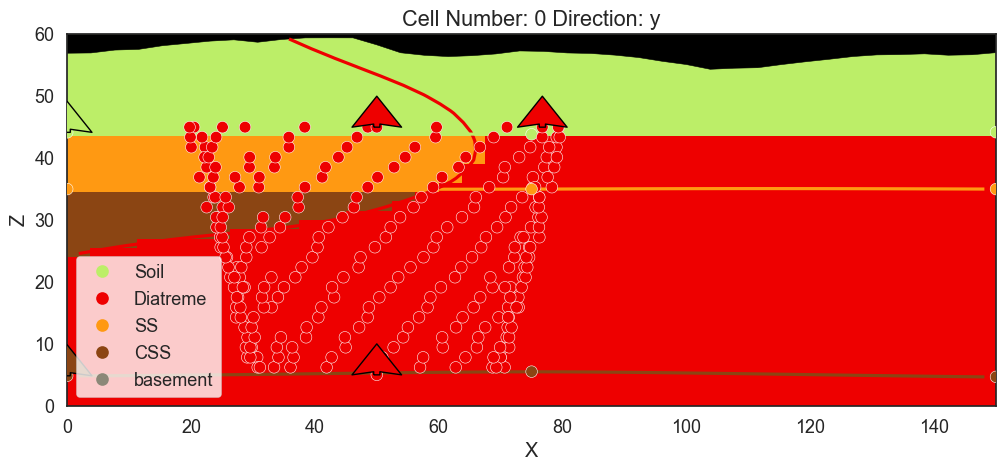

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


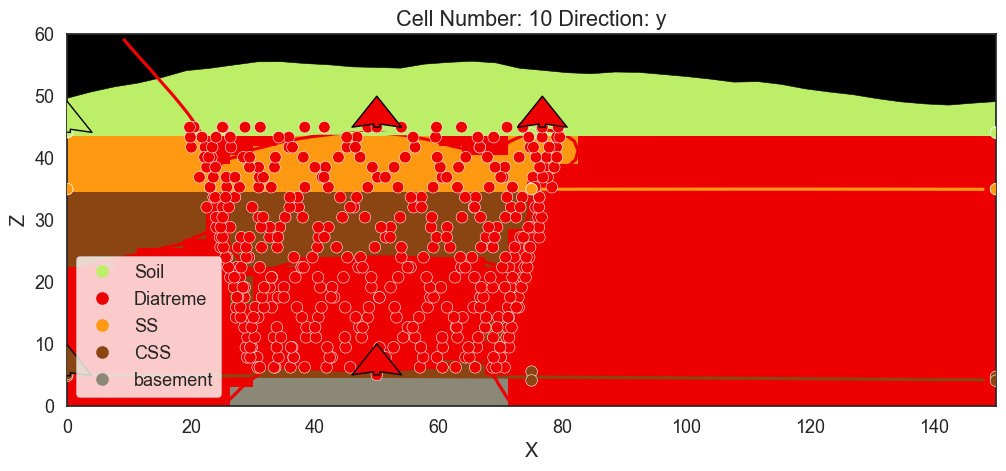

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


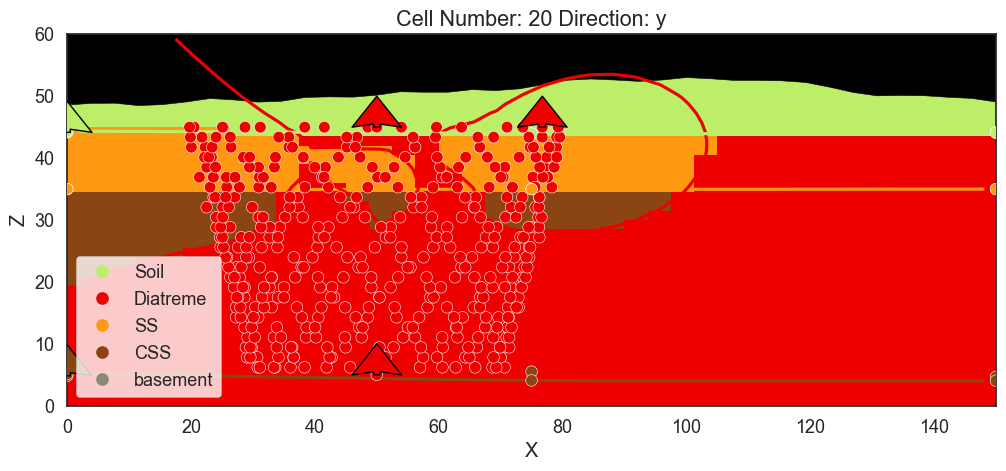

C:\Users\azieg\anaconda3\envs\agp\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


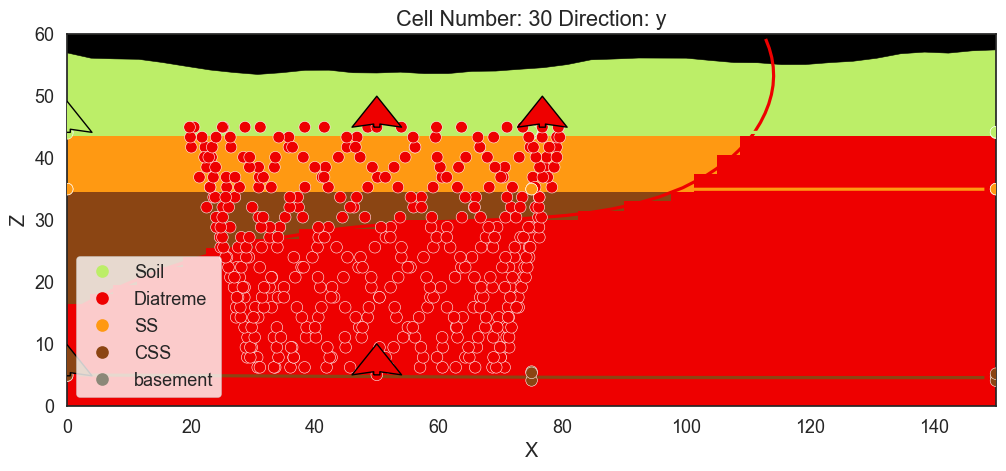

In [58]:
gp.plot_2d(geo_model, show_data=True, cell_number=0, direction='y', plot_data=True, show_topography=True)
plt.show()
gp.plot_2d(geo_model, show_data=True, cell_number=10, show_topography=True)
plt.show()
gp.plot_2d(geo_model, show_data=True, cell_number=20, show_topography=True)
plt.show()
gp.plot_2d(geo_model, show_data=True, cell_number=30, show_topography=True)
plt.show()